## Exercise 2
* **Dataset:** [`Red wine`](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* **Model to use:** [`Random Forest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* **Model evaluation:** [`ROC curve`](https://intellipaat.com/blog/roc-curve-in-machine-learning/)

Give a try to `Random Forest` with the `Red Wine` dataset!

This time, after using the classification report, also check the [ROC curve](https://intellipaat.com/blog/roc-curve-in-machine-learning/).

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
df= pd.read_csv('./assets/winequality-red.csv')
wine = df

In [36]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [39]:
# basic exploration
wine.isnull().sum()   # no nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Let's do some plotting to know how the data columns are distributed in the dataset

In [40]:
wine['quality'].value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Fixed acidity')

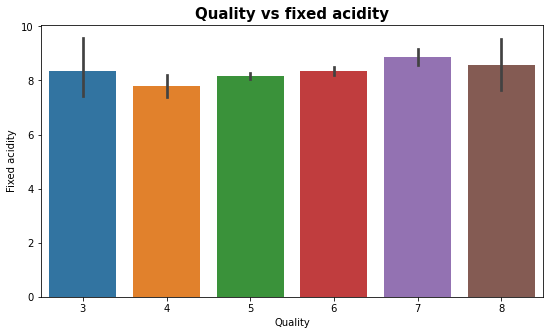

In [41]:
# Add your code here...

fig = plt.figure(figsize=(9,5))
sns.barplot(x='quality', y='fixed acidity', data=wine)
plt.title('Quality vs fixed acidity', fontsize = 15, fontweight = 'bold')
plt.xlabel('Quality', fontsize=10)
plt.ylabel('Fixed acidity', fontsize=10)

#Here we see that fixed acidity does not give any specification to classify the quality

Text(0, 0.5, 'Volatile acidity')

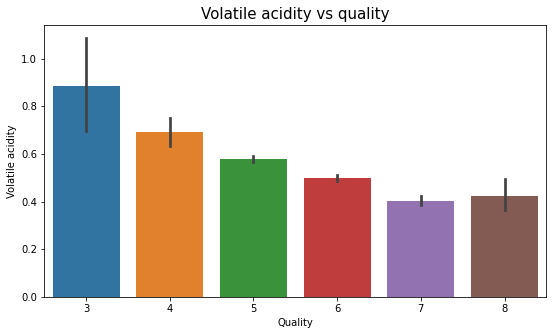

In [42]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)
plt.title('Volatile acidity vs quality', fontsize = 15)
plt.xlabel('Quality')
plt.ylabel('Volatile acidity')

#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

Text(0, 0.5, 'citric acid')

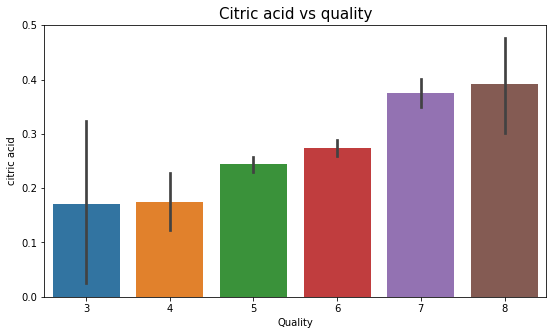

In [43]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x='quality', y='citric acid', data=wine)
plt.title('Citric acid vs quality', fontsize = 15)
plt.xlabel('Quality')
plt.ylabel('citric acid')

#Composition of citric acid go higher as we go higher in the quality of the wine

Text(0, 0.5, 'residual sugar')

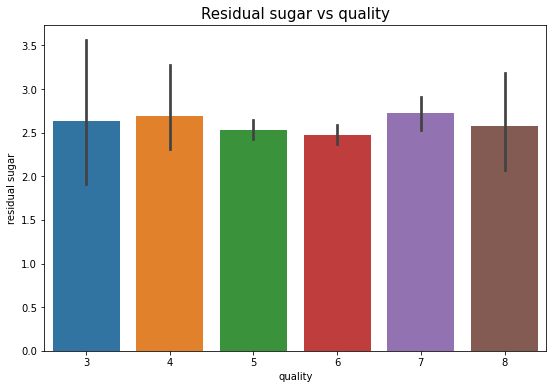

In [44]:
fig = plt.figure(figsize=(9,6))
sns.barplot(x= 'quality', y='residual sugar', data=wine)
plt.title('Residual sugar vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('residual sugar')


Text(0, 0.5, 'chlorides')

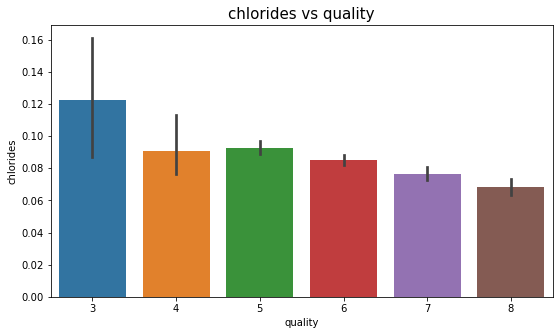

In [45]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x= 'quality', y='chlorides', data=wine)
plt.title('chlorides vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('chlorides')


Text(0, 0.5, 'free sulfur dioxide')

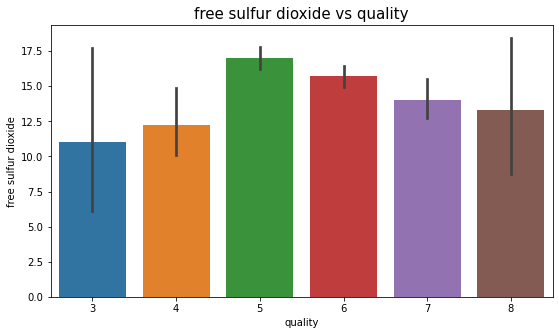

In [46]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x= 'quality', y='free sulfur dioxide', data=wine)
plt.title('free sulfur dioxide vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')

Text(0, 0.5, 'total sulfur dioxide')

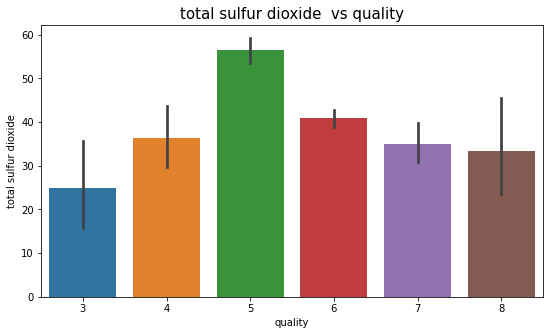

In [47]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x= 'quality', y='total sulfur dioxide', data=wine)
plt.title('total sulfur dioxide  vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')

Text(0, 0.5, 'sulphates')

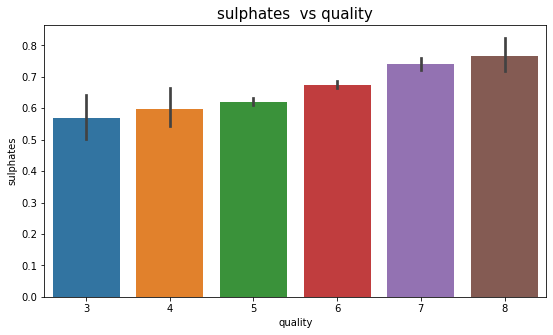

In [48]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x= 'quality', y='sulphates', data=wine)
plt.title('sulphates  vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('sulphates')

Text(0, 0.5, 'alcohol')

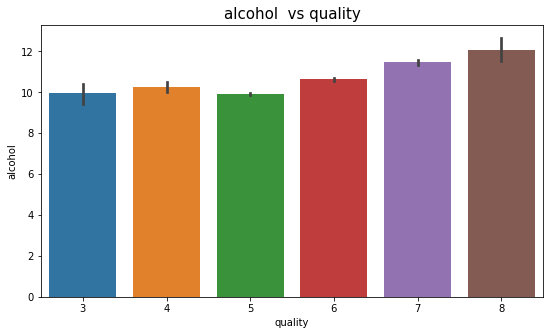

In [49]:
fig = plt.figure(figsize=(9,5))
sns.barplot(x= 'quality', y='alcohol', data=wine)
plt.title('alcohol  vs quality', fontsize= 15)
plt.xlabel('quality')
plt.ylabel('alcohol')

Preprocessing Data for performing Machine learning algorithms

In [50]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [52]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [53]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

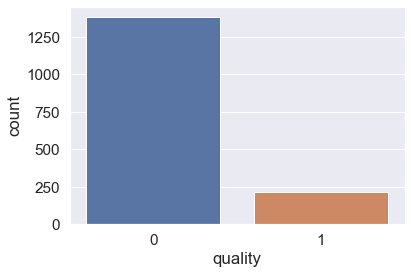

In [93]:
sns.countplot(x='quality', data=wine)

#### Declare feature vector and target variable

In [55]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

#X = wine.drop(['quality','fixed acidity', 'residual sugar'], axis = 1)

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
#from sklearn.preprocessing import StandardScaler, LabelEncoder
    
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [58]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)   #X_test = sc.transform(X_test)  IS THE BEST

Our training and testing data is ready now to perform machine learning algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

### Confusion Matrix

In [64]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, y_pred_rfc))


[[265   8]
 [ 28  19]]


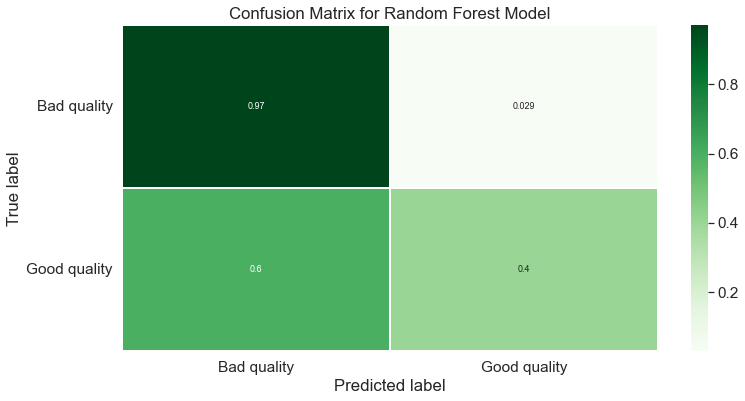

In [79]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rfc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,6))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':9},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Bad quality', 'Good quality']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
#Let's see how our model performed
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320




### We can also visualize Precision and Recall using ROC curves and PRC curves.

#### Model evaluation: ROC curve
1. ROC Curves(Receiver Operating Characteristic Curve):

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = rfc.predict_proba(X_test)[:,1]
fprate, tprate, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)   #post_label =1

In [31]:
from sklearn.metrics import auc
roc_auc = auc(fprate, tprate)

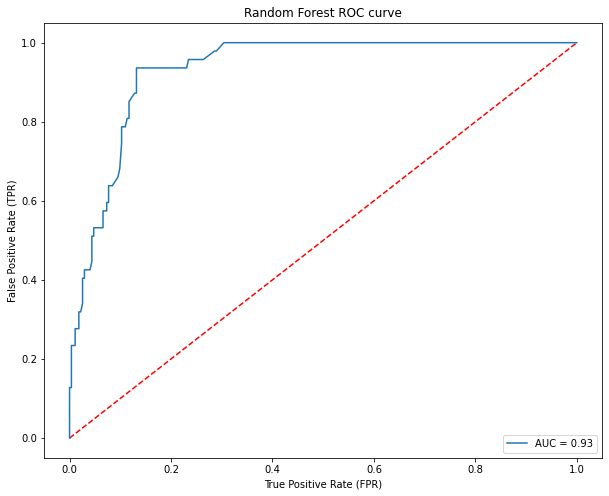

In [33]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fprate, tprate, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('Random Forest ROC curve')
plt.show()

### Model Evaluation: Precision-Recall Curve
2. Precision-Recall Curve (PRC):  
  
    Like the ROC, we plot the precision and recall for different threshold values  
      
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [87]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [88]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.6830236681592797


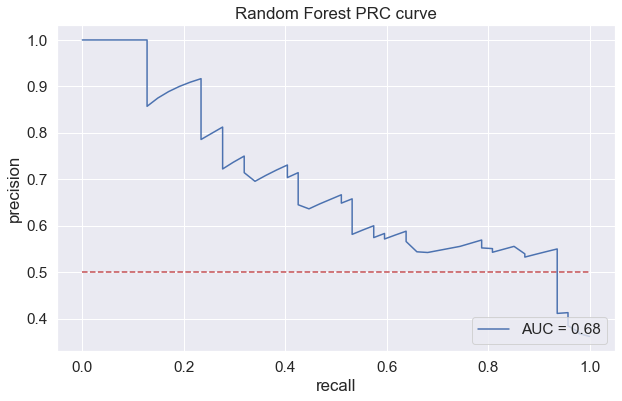

In [91]:
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0.5, 0.5],'r--')
plt.plot(recall, precision, label = 'AUC = %0.2f' % auc_prc)
plt.legend(loc = 'lower right')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest PRC curve')
plt.show()

Resources:  
  
Prediction of quality of Wine (check)  
https://www.kaggle.com/code/vishalyo990/prediction-of-quality-of-wine  

Evaluating a Random Forest model  
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

[[Iris] Understanding Random Forests Classifiers](https://www.datacamp.com/tutorial/random-forests-classifier-python)

Tutorial: Random forest on red wine quality  (not very good)  
https://www.kaggle.com/code/shyambhu/tutorial-random-forest-on-red-wine-quality/notebook  
  
What Is ROC Curve in Machine Learning? ROC Curve in Python with Example  
https://intellipaat.com/blog/roc-curve-in-machine-learning/  
  


Check:  
[Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)